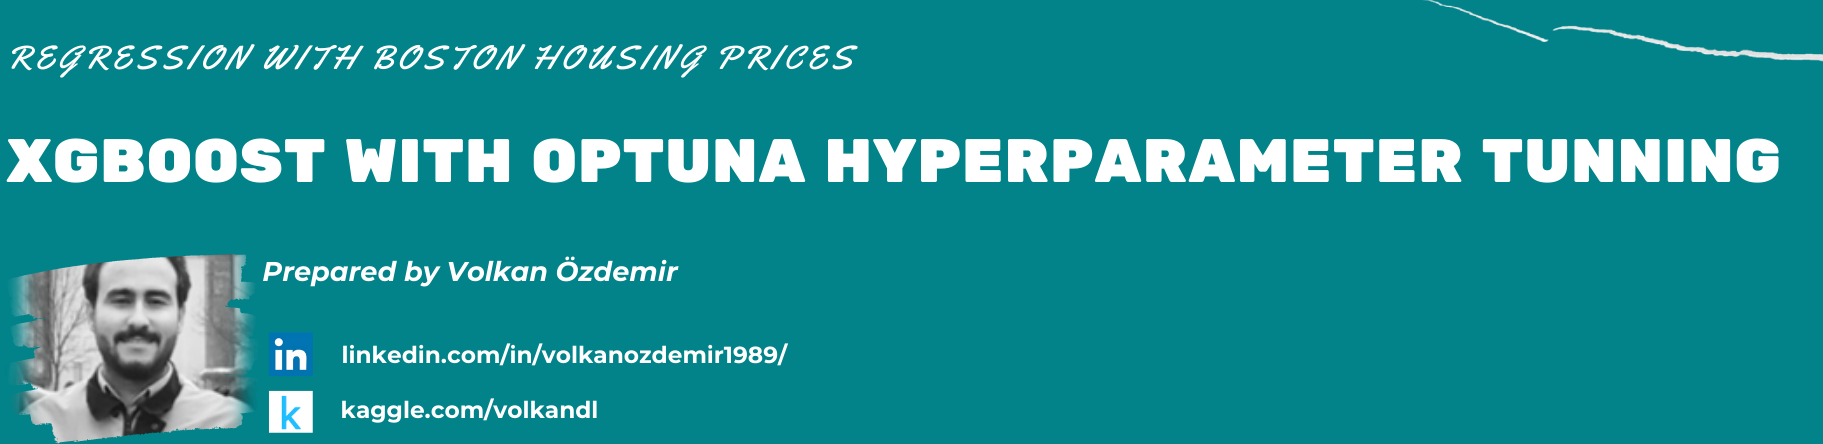

## ****$\color{orange}{\text{Welcome! Hoşgeldiniz ! स्वागत ! }}$****
##### ****$\color{orange}{\text{Learn XGBoost Regressor with OPTUNA Hyperparameter Tunning with me ! Upvote if you like this work}}$****

## ****$\color{orange}{\text{Introduction}}$****

#### $\color{purple}{\text{English: }}$

We will try to use optuna on the "boston housing prices" dataset. I will try to go step by step for understanding the data, regression model and Optuna framework for hyperparameter tuning. So keep in tune and please follow all the notebook to understand the XGBoost and Optuna. And please upvoted if you like this work and if you want me to continue to share more!

#### $\color{purple}{\text{Turkish: }}$

"Boston konut fiyatları" veri setinde optuna kullanmaya çalışacağız. Hiperparametre ayarlama için verileri, regresyon modelini ve Optuna çerçevesini anlamak için adım adım gitmeye çalışacağım. Bu nedenle, XGBoost ve Optuna'yı anlamak için lütfen tüm not defterini takip edin ve uyum sağlayın. Ve bu çalışmayı beğendiyseniz ve daha fazlasını paylaşmaya devam etmemi istiyorsanız lütfen oy verin!

#### $\color{purple}{\text{Hindi: }}$

हम "बोस्टन हाउसिंग प्राइस" डेटासेट पर ऑप्टुना का उपयोग करने का प्रयास करेंगे। मैं हाइपरपैरामीटर ट्यूनिंग के लिए डेटा, रिग्रेशन मॉडल और ऑप्टुना फ्रेमवर्क को समझने के लिए कदम दर कदम आगे बढ़ने की कोशिश करूंगा। तो बने रहें और कृपया XGBoost और Optuna को समझने के लिए सभी नोटबुक का अनुसरण करें। और अगर आपको यह काम पसंद आया हो तो कृपया अपवोट करें और अगर आप चाहते हैं कि मैं इसे और शेयर करता रहूं!






## $\color{orange}{\text{Table of Contents}}$

* [Chapter 1. EDA](#chapter1)     
* [Chapter 2. XGBoost](#chapter2)
* [Chapter 3. OPTUNA](#chapter3)
* [Chapter 4. Conclusion](#chapter4)


## $\color{Pink}{\text{Chapter 1. EDA}}$ <a class="anchor" id="chapter1"></a>

Libraries: we need plotly > 4.0.0 to use optuna plots. We will use xgboost as well. And we will use sklearn for metrics.


Kütüphaneler: optuna arsalarını kullanmak için arsa> 4.0.0'a ihtiyacımız var. Biz de xgboost kullanacağız. Ve metrikler için sklearn kullanacağız.


पुस्तकालय: ऑप्टुना भूखंडों का उपयोग करने के लिए हमें प्लॉटली> 4.0.0 की आवश्यकता होती है। हम xgboost का भी उपयोग करेंगे। और हम मेट्रिक्स के लिए sklearn का उपयोग करेंगे।

> !pip install optuna

> import optuna

> import xgboost as xgb


In [ ]:
#!pip install optuna #for local system
import numpy as np 
import pandas as pd 
import os
import warnings
import math 
!pip install plotly==4.1.0
import plotly
from plotly.offline import iplot
warnings.filterwarnings("ignore")
print(plotly.__version__)
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas_profiling as pp
import xgboost as xgb
import optuna
import optuna.integration.lightgbm as lgb
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, ShuffleSplit
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [ ]:
path = r"/kaggle/input/boston-house-prices/housing.csv"

In [ ]:
header_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv(path, names=header_names, delim_whitespace=True)
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe()

* We have no NaN values in the complete dataset.
* Tam veri kümesinde NaN değerimiz yok.
* हमारे पास संपूर्ण डेटासेट में कोई NaN मान नहीं है।

In [ ]:
df.isnull().sum()

In [ ]:
pp.ProfileReport(df)

* We will not cleaning the data for this notebook because we are focussing on the xgboost parameter search by optuna. For a full scale analysis, after Exploratory data analysis data cleaning should be done. Checking multicolinearity, checking outliers and some feature engineering. Hence, check pandas profileReport and follow the cleaning steps. You can check my other notebooks [here](https://www.kaggle.com/volkandl/eda-cleaning-smote-prediction-97-recall)


* Bu not defteri için verileri temizlemeyeceğiz çünkü optuna ile xgboost parametre aramasına odaklanıyoruz. Tam ölçekli bir analiz için Keşifsel veri analizinden sonra veri temizliği yapılmalıdır. Çoklu doğrusallığı kontrol etme, aykırı değerleri kontrol etme ve bazı özellik mühendisliği. Bu nedenle, pandas profileReport'u kontrol edin ve temizleme adımlarını izleyin. Diğer defterlerimi [buradan](https://www.kaggle.com/volkandl/eda-cleaning-smote-prediction-97-recall) inceleyebilirsiniz.

* हम इस नोटबुक के लिए डेटा की सफाई नहीं करेंगे क्योंकि हम ऑप्टुना द्वारा xgboost पैरामीटर खोज पर ध्यान केंद्रित कर रहे हैं। पूर्ण पैमाने पर विश्लेषण के लिए, खोजपूर्ण डेटा विश्लेषण के बाद डेटा की सफाई की जानी चाहिए। मल्टीकोलिनियरिटी की जाँच करना, आउटलेर्स की जाँच करना और कुछ फीचर इंजीनियरिंग की जाँच करना। इसलिए, पांडा प्रोफाइल की जांच करेंरिपोर्ट करें और सफाई चरणों का पालन करें। आप मेरी अन्य नोटबुक यहाँ देख [सकते](https://www.kaggle.com/volkandl/eda-cleaning-smote-prediction-97-recall) हैं।

In [ ]:
#Our Target is to predict PRICE Column which contains contonous data
X = df.iloc[:,:-1]
y = df["PRICE"]

In [ ]:
sxc = StandardScaler()
X = sxc.fit_transform(X)

## $\color{Pink}{\text{Chapter 2. XGBoost}}$ <a class="anchor" id="chapter2"></a>

**ENG:** To understand the XGBoost better, it is very essential to understand what is ensemble learning. Ensemble learning is aiming to combine the predictions of several base estimators which are built with the corresponding data in order to achieve better results. There are two types of ensemble learning: Averaging methods (i.e bagging, RandomForest, ExtraTrees etc.) and Boosting Methods (i.e AdaBoost, GradientTreeBoosting, XGBoost, LightGBM, CatBoost, Histogram-Based-Gradient-Boosting etc.). XGBoost is one of the state-of-the-art boosting type ensemble method. It means "Extreme Gradient Boosting" and it comes out in 2016. It contains sequential prediction trees and learns the best parameters to achieve the objective.

**TR:** XGBoost'u daha iyi anlamak için topluluk (ensemble) öğrenmenin ne olduğunu anlamak çok önemlidir. Topluluk (ensemble) öğrenimi, daha iyi sonuçlar elde etmek için ilgili verilerle oluşturulan birkaç temel tahmincinin tahminlerini birleştirmeyi amaçlar. İki tür topluluk öğrenimi vardır: Ortalama alma yöntemleri (ör. Bagging, RandomForest, ExtraTrees vb.) ve Yükseltme Yöntemleri (ör. AdaBoost, GradientTreeBoosting, XGBoost, LightGBM, CatBoost, Histogram-Based-Gradient-Boosting vb.). XGBoost, son teknoloji boosting tipi ensemble yöntemlerinden biridir. "Extreme Gradient Boost" anlamına gelir ve 2016'da yayınlanmıştır. Sıralı tahmin ağaçları içerir ve hedefe ulaşmak için en iyi parametreleri öğrenir.

**HINDI:** XGBoost को बेहतर ढंग से समझने के लिए, यह समझना बहुत जरूरी है कि एन्सेम्बल लर्निंग क्या है। एन्सेम्बल लर्निंग का लक्ष्य कई आधार अनुमानकों की भविष्यवाणियों को जोड़ना है जो बेहतर परिणाम प्राप्त करने के लिए संबंधित डेटा के साथ बनाए गए हैं। पहनावा सीखने के दो प्रकार हैं: औसत विधियाँ (Bagging, रैंडमफ़ॉरेस्ट, एक्स्ट्राट्रीज़ आदि) और बूस्टिंग मेथड्स (यानी AdaBoost, GradientTreeBoosting, XGBoost, LightGBM, CatBoost, हिस्टोग्राम-आधारित-ग्रेडिएंट-बूस्टिंग आदि)। 
XGBoost अत्याधुनिक बूस्टिंग टाइप एन्सेम्बल पद्धति में से एक है। इसका अर्थ है "एक्सट्रीम ग्रैडिएंट बूस्टिंग" और यह 2016 में सामने आया। इसमें अनुक्रमिक भविष्यवाणी पेड़ शामिल हैं और उद्देश्य को प्राप्त करने के लिए सर्वोत्तम मापदंडों को सीखते हैं।

* XGBoost takes inputs as: Dense Matrix, Sparse Matrix, Data File or DMatrix ( xgb input matrix type )

* XGBoost girdileri şu şekilde alır: Yoğun Matris, Seyrek Matris, Veri Dosyası veya DMatrix ( xgb giriş matrisi tipi)

* XGBoost इस प्रकार इनपुट लेता है: Dense Matrix, Sparse Matrix, Data File या DMatrix (xgb इनपुट मैट्रिक्स टाइप)

What is an XGBoost DMatrix?
* DMatrix is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed. 

* In below i will show 3 tyeps of using XGBoosting, in the following parts of the note book we will use the 3rd one. However, for a better solution the combination of 2nd and 3rd must be use which means OPTUNA should be used with cross validation.

* Aşağıda XGBoosting kullanımının 3 çeşidini göstereceğim, not defterinin ilerleyen kısımlarında 3.yü kullanacağız. Ancak daha iyi bir çözüm için 2. ve 3. kombinasyonu kullanılmalıdır, yani OPTUNA çapraz doğrulama ile kullanılmalıdır.

* नीचे मैं XGBoosting का उपयोग करने के 3 प्रकार दिखाऊंगा, नोट बुक के निम्नलिखित भागों में हम 3 का उपयोग करेंगे। हालांकि, बेहतर समाधान के लिए दूसरे और तीसरे के संयोजन का उपयोग किया जाना चाहिए जिसका अर्थ है कि ऑप्टुना को क्रॉस सत्यापन के साथ उपयोग किया जाना चाहिए।

### Usage of XGBoost 1:  with .fit Training

In [ ]:
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.33)


my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[( X_test, y_test)], verbose=False)

# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolude Error is {}".format( (mean_absolute_error(predictions, y_test))))
print("Mean Squared Error is {}".format( math.sqrt(mean_absolute_error(predictions, y_test))))

### Usage Usage of XGBoost 2:  with KFold Cross Validation

In [ ]:
n_splits = 10
cross_val = KFold( n_splits  = n_splits, random_state = 0)
xgb_reggressor = xgb.XGBRegressor()
#scoring= ["neg_root_mean_squared_error", "r2" ]
scores = cross_val_score(xgb_reggressor, X_train, y_train, scoring="neg_root_mean_squared_error" ,n_jobs=-1, cv= cross_val )

print("scores of {} split cross validation are: {}".format(n_splits, scores))
print("mean of the scores is {}, standard deviation of the scores is {}".format( np.mean(scores),np.std(scores) ))

### Usage Usage of XGBoost 3:  with xgb.DMatrix Input

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.33)

#Store the train and test data into XGBOOST Matrix form
df_train = xgb.DMatrix(X_train,y_train)
df_test = xgb.DMatrix(X_test, y_test)


In [ ]:
def RMSE ( params ):
    model = xgb.train(params,df_train, evals=[(df_test,"eval")],  num_boost_round = 600 , verbose_eval = 0 , early_stopping_rounds = 64)
    perf = model.eval(df_test)
    perf=float( perf.split(":")[1] ) 
    return perf

In [ ]:
base_score = RMSE(params = {})
print("base score with default parameters is {}".format (base_score))

## $\color{Pink}{\text{Chapter 3. OPTUNA}}$ <a class="anchor" id="chapter3"></a>

**ENG:** OPTUNA is an auto hyperparameter optimization software framework. It is one of the most efficient optimizers for machine learning and deep learning. It has many advantages according to other traditional methods like grid search or random search. The ultimate goal is to find out the optimum set of hyperparameters through multiple iterations. In optuna there are 2 main terms:

1. Study : optimization based on an objective function
2. Trial : a single execution of the objective function

By the way , we do not tune n_estimator because it is really keen on overfitting, we will control the n_estimator with early_stopping_rounds to stop the training when the generalization error starts to increase successively in the defined rounds (that means when overfitting occurs).

**TR:**  OPTUNA, bir otomatik hiperparametre optimizasyon yazılımı çerçevesidir. Makine öğrenimi ve derin öğrenme için en verimli optimize edicilerden biridir. Izgara arama veya rastgele arama gibi diğer geleneksel yöntemlere göre birçok avantajı vardır. Nihai hedef, çoklu yinelemeler yoluyla optimum hiperparametre setini bulmaktır. optuna'da 2 ana terim vardır:


1. Çalışma : bir amaç fonksiyonuna dayalı optimizasyon
2. Deneme : amaç fonksiyonunun tek bir uygulaması

**HINDI:** OPTUNA एक ऑटो हाइपरपैरामीटर ऑप्टिमाइजेशन सॉफ्टवेयर फ्रेमवर्क है। यह मशीन लर्निंग और डीप लर्निंग के लिए सबसे कुशल ऑप्टिमाइज़र में से एक है। ग्रिड सर्च या रैंडम सर्च जैसे अन्य पारंपरिक तरीकों के अनुसार इसके कई फायदे हैं। अंतिम लक्ष्य कई पुनरावृत्तियों के माध्यम से हाइपरपैरामीटर के इष्टतम सेट का पता लगाना है। ऑप्टुना में 2 मुख्य शब्द हैं:


1. alışma : बीर अमाक फोंक्सियोनुना दयालı ऑप्टिमिज़ास्योन
2. डेनेमे : अमाक फोंकसीयोनुन टेक बीर उयगुलामासी

source: https://optuna.readthedocs.io/en/stable/

In [ ]:
def objective_function ( trial ):
    paramsx = {"max_depth": trial.suggest_int("max_depth",3,10),
              "reg_alpha": trial.suggest_uniform("reg_alpha",2, 6),
              "reg_lambda": trial.suggest_uniform("reg_lambda",0,2),
              "min_child_weight": trial.suggest_int("min_child_weight",0,5),
              "gamma": trial.suggest_uniform("gamma",0,4),
              "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
              "colsample_bytree" : trial.suggest_uniform("colsample_bytree",0.4,0.9),
              "subsample": trial.suggest_uniform("subsample",0.4,0.9),
              "nthread": -1 
        
  
    }
    return (RMSE(paramsx)) # For the minimizing optimization it should return a score, here we return RMSE score
    

**ENG:**

* Direction is states what we would like to aim or what is our objective such minimizing the RMSE score in this case or it can be maximize the R2 or Recall or F1 score as well.
* sampler means which algorithm we will use, we will select TPESampler()
* we will study.optimize() to start searching, in optimize function we should give our objective function
* n_trials states how many iteration will take place in searching

**TR:**
* Yön, ne amaçlamak istediğimizi veya bu durumda RMSE puanını en aza indirmek gibi hedefimizin ne olduğunu belirtir veya R2 veya Geri Çağırma veya F1 puanını da en üst düzeye çıkarabilir.
* örnekleyici hangi algoritmayı kullanacağımız anlamına gelir, TPESampler() öğesini seçeceğiz
* aramaya başlamak için study.optimize() yapacağız, optimize fonksiyonunda amaç fonksiyonumuzu vermeliyiz
* n_trials, aramada kaç yinelemenin gerçekleşeceğini belirtir

**HINDI**
* निर्देश बताता है कि हम क्या लक्ष्य बनाना चाहते हैं या हमारा उद्देश्य क्या है जैसे कि इस मामले में आरएमएसई स्कोर को कम करना या यह आर 2 या रिकॉल या एफ 1 स्कोर को भी अधिकतम किया जा सकता है।
* सैम्पलर का अर्थ है कि हम किस एल्गोरिथम का उपयोग करेंगे, हम TPESampler () का चयन करेंगे
* हम अध्ययन करेंगे। ऑप्टिमाइज़ () खोज शुरू करने के लिए, ऑप्टिमाइज़ फ़ंक्शन में हमें अपना उद्देश्य फ़ंक्शन देना चाहिए
* n_trials बताता है कि खोज में कितनी पुनरावृत्ति होगी

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING) 
study = optuna.create_study(direction="minimize", sampler = TPESampler())
study.optimize(objective_function, n_trials = 1000 , show_progress_bar=True)

In [ ]:
trial = study.best_trial
best_score = (trial.value)
print("Accuracy is {}".format(trial.value))

In [ ]:
impr=  int((base_score/best_score*100)-100)
print("The accuracy with tunning has improved from {} to {} by {} %".format(base_score, best_score,impr))


Best is trial 999 with value: 2.485847. which means n_estimator gives a great result @999

In [ ]:
best_param={}
best_param.update(study.best_params)
print(best_param)

In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

# Tunning One More Time with Using of Slice Plot

* We will do one more search with the above slice history. The reason of that is to improve our algorithm one step further with narrowing the search slices!!! This iis one of the greatest idea on hyperparameter search. It causes time but totally worth.

* Yukarıdaki dilim geçmişi ile bir arama daha yapacağız. Bunun nedeni arama dilimlerini daraltarak algoritmamızı bir adım daha ileriye taşımaktır!!! Bu, hiperparametre aramasındaki en büyük fikirlerden biridir. Zamana neden olur ama tamamen değer.


* हम उपरोक्त स्लाइस इतिहास के साथ एक और खोज करेंगे। इसका कारण खोज स्लाइस को कम करके हमारे एल्गोरिदम को एक कदम आगे बढ़ाना है !!! यह हाइपरपैरामीटर खोज पर सबसे महान विचारों में से एक है। यह समय का कारण बनता है लेकिन पूरी तरह से लायक है।

We will narrow the searching intervals as below:
* colsample_bytree --> between 0.60 and 0.85
* gamma  --> between 1.40 and 3.75
* learning_rate --> 0.034 and 0.090
* reg_alpha --> 2 and 4
* reg_lambda --> 0. and 0.4
* subsample --> 0.40 and 0.6
* max_depty --> 9
* min_child_weight --> 3

In [ ]:
def objective_function2 ( trial ):
    paramsx = {"max_depth": trial.suggest_int("max_depth",9,9),
              "reg_alpha": trial.suggest_uniform("reg_alpha",2, 4),
              "reg_lambda": trial.suggest_uniform("reg_lambda",0,0.42),
              "min_child_weight": trial.suggest_int("min_child_weight",3,3),
              "gamma": trial.suggest_uniform("gamma",1.4,3.75),
              "learning_rate": trial.suggest_loguniform("learning_rate", 0.034, 0.09),
              "colsample_bytree" : trial.suggest_uniform("colsample_bytree",0.60,0.85),
              "subsample": trial.suggest_uniform("subsample",0.40,0.6),
              "nthread": -1 
        
  
    }
    return (RMSE(paramsx)) # For the minimizing optimization it should return a score, here we return RMSE score
    

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING) 
study2 = optuna.create_study(direction="minimize", sampler = TPESampler())
study2.optimize(objective_function2, n_trials = 1020 , show_progress_bar=True)

In [ ]:
trial = study2.best_trial
best_score2 = (trial.value)
print("Accuracy is {}".format(trial.value))

In [ ]:
impr2=  int((best_score/best_score2*100)-100)
print("The accuracy with narrowing has improved from {} to {} by {} %".format(best_score, best_score2,impr2))


In [ ]:
optuna.visualization.plot_optimization_history(study2)

In [ ]:
optuna.visualization.plot_slice(study2)

In [ ]:
final_best_param={}
final_best_param.update(study2.best_params)
print(final_best_param)

Finding the best n_estimators by using Early Stopping

In [ ]:
final_model = xgb.train(final_best_param, df_train, num_boost_round = 600, evals=[(df_test,"eval")],early_stopping_rounds=64,verbose_eval=1)

## $\color{Pink}{\text{Chapter 4. Conclusion}}$ <a class="anchor" id="chapter4"></a>

In [ ]:
xgb_boss = xgb.XGBRegressor ( **final_best_param, n_estimators = 260 )
xgb_base = xgb.XGBRegressor ( )

In [ ]:
xgb_base.fit(X_train,y_train)
score_base = xgb_base.score(X_test,y_test)

In [ ]:
xgb_boss.fit(X_train,y_train)
score_boss = xgb_boss.score(X_test,y_test)
perc = score_base/score_boss*100
print("We achieved to increase XGB R2 score from {} to {}".format(score_base, score_boss, perc))